![image.png](attachment:image.png)

----------------------------------------------

# Dataset 1 - Categorical Feature Encoding Challenge II(Kaggle)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
test_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [6]:
print(train_df.shape, test_df.shape)

(600000, 25) (400000, 24)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [8]:
# check for unique values
train_df.nunique()

,0
id,600000
bin_0,2
bin_1,2
bin_2,2
bin_3,2
bin_4,2
nom_0,3
nom_1,6
nom_2,6
nom_3,6


In [9]:
train_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

# Categorical variables

## 1. Ordinal categorical variables

In [10]:
for idx in enumerate(train_df['ord_2'].unique()):
    print(idx)

(0, 'Hot')
(1, 'Warm')
(2, 'Freezing')
(3, 'Lava Hot')
(4, 'Cold')
(5, 'Boiling Hot')
(6, nan)


### Convert these to a numerical format to use in categorisation

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']:
    train_df['le_' + col] = le.fit_transform(train_df[col])
    test_df['le_' + col] = le.transform(test_df[col]) #use transform, not fit_transform.
    le = LabelEncoder() #create a new label encoder for each column.

#or, a better way to do it, to avoid creating a new label encoder each time.
le_dict = {}
for col in ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']:
    le_dict[col] = LabelEncoder()
    train_df['le_' + col] = le_dict[col].fit_transform(train_df[col])
    test_df['le_' + col] = le_dict[col].transform(test_df[col])

### This can be used in any tree based models
- Random Forest
- Decision Tree
- Tree based boosting models - XgBoost, GBM, LightGBM

### The order is not if we used LE directly   
### Its best to specify manually whenever possible

In [12]:
# ord_2_label_map = {
#     "Freezing": 0,
#     "Cold": 1,
#     "Warm": 2,
#     "Hot": 3,
#     "Boiling Hot": 4,
#     "Lava Hot": 5
# }

# train_df['ord_2_ordered_mapping'] = train_df['ord_2'].map(ord_2_label_map)
# test_df['ord_2_ordered_mapping'] = test_df['ord_2'].map(ord_2_label_map)

# train_df[['ord_2', 'le_ord_2', 'ord_2_ordered_mapping']].head(10)

In [13]:
# train_df[train_df["ord_2"].isna()][["ord_2", "ord_2_ordered_mapping"]].head(10)

## 2. Nominal Categorical variables

In [14]:
print("Categories in nom_1:")
for idx, cat in enumerate(train_df["nom_1"].unique()):
    print(idx, "-", cat)

Categories in nom_1:
0 - Trapezoid
1 - Star
2 - nan
3 - Circle
4 - Triangle
5 - Polygon
6 - Square


In [15]:
print("Categories in nom_2:")
for idx, cat in enumerate(train_df["nom_2"].unique()):
    print(idx, "-", cat)

Categories in nom_2:
0 - Hamster
1 - Axolotl
2 - Lion
3 - Dog
4 - Cat
5 - Snake
6 - nan


### Label encode for tree based models   
### One hot encode for linear models, NNs or SVMs

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoding to ord_1 in train_df
ohe.fit(train_df[['ord_1']])
train_ohe = ohe.transform(train_df[['ord_1']])
col_names = [f'ord_1_ohe_{cat}' for cat in ohe.categories_[0]]
train_ohe_df = pd.DataFrame(train_ohe, columns=col_names)
train_df = pd.concat([train_df.reset_index(drop=True), train_ohe_df.reset_index(drop=True)], axis=1)

# Apply OneHotEncoding to ord_1 in test_df
test_ohe = ohe.transform(test_df[['ord_1']])
col_names = [f'ord_1_ohe_{cat}' for cat in ohe.categories_[0]]
test_ohe_df = pd.DataFrame(test_ohe, columns=col_names)
test_df = pd.concat([test_df.reset_index(drop=True), test_ohe_df.reset_index(drop=True)], axis=1)

In [17]:
# nom_1_ohe_df = pd.DataFrame(nom_1_ohe, columns=["nom_1_" + str(cat) for cat in ohe.categories_[0]])

# nom_1_ohe_df.head()

## Handling missing values

### It is always best to find the core reason behind missing values and use a customized solution for handling them. If that is not possible, following are some general purpose solutions.

## 1. Filling with Mode: The laziest option. Should be the last resort.

In [18]:
train_df["ord_1"].isna().value_counts()

,count
ord_1,
False,581959
True,18041


In [19]:
train_df["ord_1"].value_counts()

,count
ord_1,
Novice,160597
Expert,139677
Contributor,109821
Grandmaster,95866
Master,75998


In [20]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']

for col in ord_cols:
    mode_val = train_df[col].mode()[0]  # Calculate mode from train data only
    train_df[f"{col}_without_na"] = train_df[col].fillna(mode_val)
    test_df[f"{col}_without_na"] = test_df[col].fillna(mode_val)

## 2. Create a new category - missing/unknown

* Keeps missing data distinct while still being interpretable
* Prevents information loss without making assumptions.
* Helpful when missing values might have meaning `(e.g., missing salary → unemployed)`
* Handles `unseen categories` during inference:
    * If the model encounters a category not seen during training, it may throw an error or fail to make a prediction.
    * By using `MISSING` / `UNKNOWN` during training, the model `learns to generalize to new categories` instead of breaking.

In [21]:
train_df["ord_1"].unique()

array(['Contributor', 'Grandmaster', nan, 'Novice', 'Expert', 'Master'],
      dtype=object)

In [22]:
for col in ord_cols:
    train_df[f"{col}_with_unknown_cat"] = train_df[col].fillna("UNKNOWN")
    test_df[f"{col}_with_unknown_cat"] = test_df[col].fillna("UNKNOWN")

In [23]:
train_df["ord_1_with_unknown_cat"].unique()

array(['Contributor', 'Grandmaster', 'UNKNOWN', 'Novice', 'Expert',
       'Master'], dtype=object)

## 3. Fill with the Most Frequent Category Based on Another Feature (Conditional Imputation)

### When to Avoid: If there is no strong correlation between features.

In [24]:
train_df["nom_5"].isna().value_counts()

,count
nom_5,
False,582222
True,17778


In [25]:
train_df["nom_5"].value_counts()

,count
nom_5,
fc8fc7e56,977
360a16627,972
7917d446c,961
423976253,961
079b76328,960
...,...
7335087fd,5
30019ce8a,3
0385d0739,1


In [26]:
train_df.groupby("day")["nom_5"].apply(lambda x: x.mode()[0]) # mode() returns a Series

,nom_5
day,
1.0,fe2d7e137
2.0,1925bf87e
3.0,124963b67
4.0,7cfaa2662
5.0,f4c4a7cc2
6.0,691ebeae8
7.0,360a16627


In [27]:
nom_cols = [f"nom_{i}" for i in range(10)]

for col in nom_cols:
    train_df[f"{col}_fill_grouped_na"] = train_df.groupby("day")[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "UNKNOWN")
    test_df[f"{col}_fill_grouped_na"] = test_df.groupby("day")[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "UNKNOWN")

# Create new features

## 1. Add a feature with counts of each category

In [28]:
# Calculate frequency mappings for each 'ord' column in the training data
freq_maps = {}
for col in ord_cols:
    freq_maps[col] = train_df[col].value_counts(normalize=True).to_dict()

# Apply frequency mappings to train and test DataFrames
for col in ord_cols:
    train_df[f"{col}_frequency"] = train_df[col].map(freq_maps[col])
    test_df[f"{col}_frequency"] = test_df[col].map(freq_maps[col])

### The count tells the model how common or rare a category is.

<font size=3>

* Categories that appear frequently may behave differently than rare ones.

    * 🔹 Example: In fraud detection, a frequently occurring merchant may be low risk, while a rare one may be high risk.
<br>

* Improves Generalization for Unseen Categories:

  * When a new, unseen category appears in test data, `One-Hot Encoding fails` because it wasn’t seen during training.
  * Count encoding generalizes better because it can `assign a frequency of 1` to unseen categories.

<br>

</font>

## 2. Create new categories based on frequency of categories in a feature

<font size=3>

We can use the new feature with the frequencies to create more fine-grained features and/or domain-specific features.

</font>

In [29]:
for col in ord_cols:
    train_df[f"{col}_is_rare"] = train_df[f"{col}_frequency"] < 1000
    test_df[f"{col}_is_rare"] = test_df[f"{col}_frequency"] < 1000

### Note:
#### When Should You Use Category Count Encoding?
* ✅ When the categorical feature has many unique values (e.g., city names, product categories).
* ✅ When using tree-based models (like Random Forest, XGBoost).


<br>
<br>
<br>


## 3. Create a feature which acts as a "Missing Indicator"
   
<font size=3>
    
Just like creating a feature which says whether a category is rare or not, we can create a `feature which says whether the category is NULL or not`.

</font>

In [30]:
train_df["is_ord_3_na"] = train_df["ord_3"].isna()

train_df["is_ord_3_na"].value_counts()

,count
is_ord_3_na,
False,582084
True,17916


### Why is This Useful?

<font size=3>
    
* Instead of just filling missing values, we explicitly tell the model that data was missing.
* If the reason for missingness is related to the target variable (e.g., missing credit scores for high-risk customers), this feature helps capture that relationship.

</font>

<br>
<br>
<br>
<br>

# Creating N-degree Categorical Features

<font size=3>

* Combine 2 (or more categorical columns) by concating the categories.
* Instead of treating each category independently, we create a more specific feature.
* Helps tree based models identify better splits, capture interactions and train faster.

In [31]:
train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0]).astype(int)
train_df["nom_3"] = train_df["nom_3"].fillna(train_df["nom_3"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0]).astype(int)
test_df["nom_3"] = test_df["nom_3"].fillna(test_df["nom_3"].mode()[0])


train_df["month_and_nom_0"] = train_df["month"].astype(str) + "_" + train_df["nom_3"].astype(str)

train_df[["month_and_nom_0"]].head(10)

,month_and_nom_0
0,3_Russia
1,7_India
2,9_Canada
3,3_Finland
4,12_Costa Rica
5,4_China
6,6_Costa Rica
7,1_Finland
8,3_Russia
9,8_Finland


### Do the same at scale

In [32]:
import itertools

cols_for_concatenation = ["nom_1", "nom_2", "nom_3", "nom_4"]
col_combinations = list(itertools.combinations(cols_for_concatenation, 2))

col_combinations

[('nom_1', 'nom_2'),
 ('nom_1', 'nom_3'),
 ('nom_1', 'nom_4'),
 ('nom_2', 'nom_3'),
 ('nom_2', 'nom_4'),
 ('nom_3', 'nom_4')]

In [33]:
deg2_cols = []

for col_a, col_b in col_combinations:
    new_col = "{}_{}".format(col_a, col_b)
    train_df[new_col] = train_df[col_a].astype(str) + "_" + train_df[col_b].astype(str)
    test_df[new_col] = test_df[col_a].astype(str) + "_" + test_df[col_b].astype(str)
    deg2_cols.append(new_col)

In [34]:
train_df[deg2_cols].head(10)

,nom_1_nom_2,nom_1_nom_3,nom_1_nom_4,nom_2_nom_3,nom_2_nom_4,nom_3_nom_4
0,Trapezoid_Hamster,Trapezoid_Russia,Trapezoid_Bassoon,Hamster_Russia,Hamster_Bassoon,Russia_Bassoon
1,Star_Axolotl,Star_India,Star_Theremin,Axolotl_India,Axolotl_Theremin,India_Theremin
2,nan_Hamster,nan_Canada,nan_Bassoon,Hamster_Canada,Hamster_Bassoon,Canada_Bassoon
3,Circle_Hamster,Circle_Finland,Circle_Theremin,Hamster_Finland,Hamster_Theremin,Finland_Theremin
4,Triangle_Hamster,Triangle_Costa Rica,Triangle_nan,Hamster_Costa Rica,Hamster_nan,Costa Rica_nan
5,Triangle_Lion,Triangle_China,Triangle_Bassoon,Lion_China,Lion_Bassoon,China_Bassoon
6,Triangle_Hamster,Triangle_Costa Rica,Triangle_Bassoon,Hamster_Costa Rica,Hamster_Bassoon,Costa Rica_Bassoon
7,Triangle_Axolotl,Triangle_Finland,Triangle_Bassoon,Axolotl_Finland,Axolotl_Bassoon,Finland_Bassoon
8,Polygon_Hamster,Polygon_Russia,Polygon_Oboe,Hamster_Russia,Hamster_Oboe,Russia_Oboe
9,Polygon_Hamster,Polygon_Finland,Polygon_Theremin,Hamster_Finland,Hamster_Theremin,Finland_Theremin


In [35]:
# using grid search to find the best hyperparameters
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

X = train_df.drop(["id", "target"], axis=1)
y = train_df["target"]

grid_search.fit(X, y)
grid_search.best_params_
grid_search.best_score_

# using the best hyperparameters to train the model

rf_best = RandomForestClassifier(**grid_search.best_params_)

rf_best.fit(X, y)

submission = pd.DataFrame({"id": test_df["id"], "target": y_pred})

score = accuracy_score(y, rf_best.predict(X))

print("Accuracy on training data: {:.2f}".format(score))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'F'


In [36]:
# using random search to find the best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2)

random_search.fit(X, y)
random_search.best_params_
random_search.best_score_

# using the best hyperparameters to train the model

rf_best = RandomForestClassifier(**random_search.best_params_)
rf_best.fit(X, y)

# predicting the target for the test data

y_pred = rf_best.predict(X_test)

submission = pd.DataFrame({"id": test_df["id"], "target": y_pred})

score = accuracy_score(y, rf_best.predict(X))

print("Accuracy on training data: {:.2f}".format(score))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'F'


----------------------------------------------

# Dataset 2 - Gemstone Price Prediction (Kaggle)

# Handling Numerical Features

<font size=5>

Except for tree based model, we must scale the numeric features for normalization.

</font>

In [37]:
import numpy as np

df = pd.read_csv("cubic_zirconia.csv")

replace_percentage = 0.3
n_replace = int(df.shape[0] * replace_percentage)

nan_indices = np.random.choice(df.index, n_replace, replace=False)
df.loc[nan_indices, 'carat'] = np.nan

In [38]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,NaN,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,NaN,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df["x_scaled"] = std_scaler.fit_transform(df["x"].values.reshape(-1, 1))

df[["x", "x_scaled"]].head()

,x,x_scaled
0,4.27,-1.293628
1,4.42,-1.160708
2,6.04,0.274832
3,4.82,-0.806254
4,4.35,-1.222737


# Handling missing values

## 1. Mean/Median impute (laziest resort, last option)

In [40]:
df["carat"].isna().value_counts()

,count
carat,
False,18877
True,8090


In [41]:
df["carat_mean_imputed"] = df["carat"].fillna(df["carat"].mean())

df[df["carat"].isna()][["carat", "carat_mean_imputed"]].head()

,carat,carat_mean_imputed
3,NaN,0.799223
5,NaN,0.799223
10,NaN,0.799223
11,NaN,0.799223
13,NaN,0.799223


## 2. Fill with mean value based off of another feature (conditional imputation)

In [42]:
df.groupby("clarity")["carat"].mean()

,carat
clarity,
I1,1.249805
IF,0.500354
SI1,0.850207
SI2,1.085690
VS1,0.728052
VS2,0.768959
VVS1,0.498072
VVS2,0.591653


In [43]:
df["carat_with_clarity_mean"] = df["carat"].fillna(
    df.groupby("clarity")["carat"].transform("mean")
)

df[df["carat"].isna()][["carat", "clarity", "carat_with_clarity_mean"]].head()

,carat,clarity,carat_with_clarity_mean
3,NaN,VS1,0.728052
5,NaN,VS2,0.768959
10,NaN,VS2,0.768959
11,NaN,SI1,0.850207
13,NaN,SI2,1.085690


In [44]:
df.groupby(["clarity", "cut"])["carat"].mean()

clarity  cut      
I1       Fair         1.307833
         Good         1.252162
         Ideal        1.163774
         Premium      1.254545
         Very Good    1.270667
IF       Fair         0.523333
         Good         0.644091
         Ideal        0.448548
         Premium      0.590988
         Very Good    0.618105
SI1      Fair         0.989531
         Good         0.834291
         Ideal        0.785750
         Premium      0.904778
         Very Good    0.867216
SI2      Fair         1.271525
         Good         1.011264
         Ideal        1.016838
         Premium      1.152385
         Very Good    1.073534
VS1      Fair         0.893115
         Good         0.783264
         Ideal        0.676604
         Premium      0.774247
         Very Good    0.740032
VS2      Fair         0.926344
         Good         0.860339
         Ideal        0.675930
         Premium      0.832659
         Very Good    0.815475
VVS1     Fair         0.597143
         Good         0.505139
         Ideal        0.489319
         Premium      0.528604
         Very Good    0.491615
VVS2     Fair         0.665652
         Good         0.616566
         Ideal        0.579625
         Premium      0.684150
         Very Good    0.546009
Name: carat, dtype: float64

In [45]:
df["carat_with_clarity_cut_mean"] = df["carat"].fillna(
    df.groupby(["clarity", "cut"])["carat"].transform("mean")
)

df[df["carat"].isna()][["carat", "clarity", "cut", "carat_with_clarity_cut_mean"]].head(10)

,carat,clarity,cut,carat_with_clarity_cut_mean
3,NaN,VS1,Ideal,0.676604
5,NaN,VS2,Ideal,0.675930
10,NaN,VS2,Ideal,0.675930
11,NaN,SI1,Premium,0.904778
13,NaN,SI2,Ideal,1.016838
18,NaN,SI1,Good,0.834291
26,NaN,SI1,Ideal,0.785750
27,NaN,VS2,Ideal,0.675930
35,NaN,VVS2,Premium,0.684150
38,NaN,SI1,Ideal,0.785750


In [46]:
# doing the same of all above for depth
df["depth_mean_imputed"] = df["depth"].fillna(df["depth"].mean())

df[df["depth"].isna()][["depth", "depth_mean_imputed"]].head()

,depth,depth_mean_imputed
26,NaN,61.745147
86,NaN,61.745147
117,NaN,61.745147
148,NaN,61.745147
163,NaN,61.745147


## 3. Create linear features

Linear features in numerical feature engineering are created using operations like `interaction terms, polynomial terms, feature sums, or averages` to capture the relationships between features and improve model performance.

`Interaction terms` are created by `multiplying` or more features together, capturing the combined effect of those features.

In [47]:
std_scaler = StandardScaler()
df[["carat_with_clarity_cut_mean", "depth_mean_imputed"]] = std_scaler.fit_transform(df[["carat_with_clarity_cut_mean", "depth_mean_imputed"]])

df["carat_with_clarity_cut_mean_interaction_depth"] = df["carat_with_clarity_cut_mean"] * df["depth_mean_imputed"]

`Polynomial features` capture `non-linear relationships` by raising a feature to a power (like squaring or cubing).

In [48]:
df["carat_with_clarity_cut_mean_squared"] = df["carat_with_clarity_cut_mean"] ** 2

The `sum of multiple features` can capture their `combined effect as a linear feature`.

In [49]:
df["carat_with_clarity_cut_mean_plus_depth"] = df["carat_with_clarity_cut_mean"] + df["depth_mean_imputed"]

## 4. Polynomial features at scale

In [50]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

std_scaler = StandardScaler()
scaled_feats = std_scaler.fit_transform(df[["carat_with_clarity_cut_mean", "depth_mean_imputed"]])

poly_feat_creator = PolynomialFeatures(degree=2, include_bias=False)

poly_feat = poly_feat_creator.fit_transform(scaled_feats)

In [51]:
pd.DataFrame(scaled_feats, columns=["a", "b"]).head()

,a,b
0,-1.213736,0.254475
1,-1.140689,-0.677789
2,0.247198,0.326187
3,-0.296746,-0.104088
4,-1.189387,-0.964639


In [52]:
pd.DataFrame(poly_feat, columns=["a", "b", "a^2", "ab", "b^2"]).head()

,a,b,a^2,ab,b^2
0,-1.213736,0.254475,1.473155,-0.308865,0.064757
1,-1.140689,-0.677789,1.301172,0.773147,0.459398
2,0.247198,0.326187,0.061107,0.080633,0.106398
3,-0.296746,-0.104088,0.088058,0.030888,0.010834
4,-1.189387,-0.964639,1.414642,1.147330,0.930529


# Create domain specific categories / bins from numerical columns

In [53]:
df["carat"].describe()

,carat
count,18877.000000
mean,0.799223
std,0.475479
min,0.200000
25%,0.400000
50%,0.700000
75%,1.050000
max,4.500000


In [54]:
df["is_carat_low"] = df["carat"] < 0.5

df["is_carat_low"].value_counts()

,count
is_carat_low,
False,20748
True,6219


In [55]:
num_bins = int(np.floor(np.log2(df.shape[0]) + 1))

df["carat_categories"] = pd.cut(df["carat"], num_bins, labels=False)

df["carat_categories"].value_counts()

,count
carat_categories,
0.0,6206
1.0,4555
2.0,3659
3.0,2097
4.0,1272
6.0,614
5.0,316
7.0,106
8.0,37


# Log transformation

<font size=3>

* Log transformation is particularly useful when dealing with `highly skewed data`.
* Log transformation helps to `stabilize the variance` of the data:
    * Data with a wide range (from small to large numbers) often have `heteroscedasticity`, meaning the variance of the feature changes as the value of the feature changes.
    * Taking the log of such a feature makes the variance more constant across the range of values, improving the model’s stability.
* Log transformation reduces the influence of outliers.
* Log transformation often helps models converge more quickly.
* Makes the data `symmetric`, which can improve the performance of models that assume linearity (like Logistic Regression)

</font>


### Note: You should apply log transformation for the target variable as well if it is skewed.

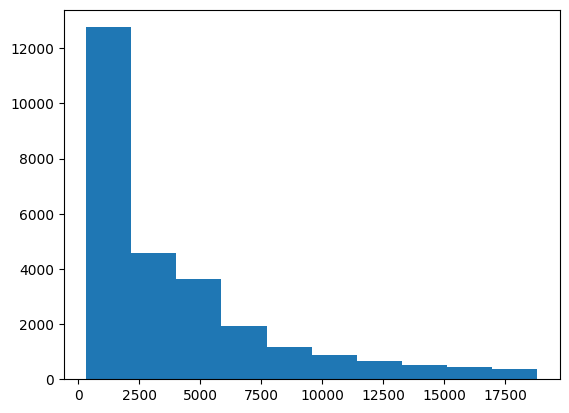

In [56]:
import matplotlib.pyplot as plt

plt.hist(df["price"]);

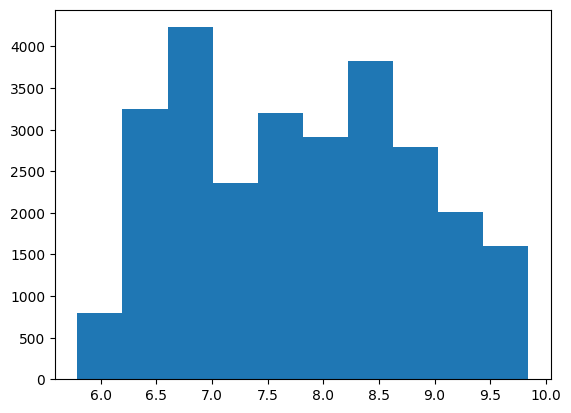

In [57]:
plt.hist(np.log1p(df["price"]));

### What to do in case we have negative values in our numeric feature?

In [58]:
np.log1p(-1)

<ipython-input-58-1c218b09fcbe>:1: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-1)


-inf

In [59]:
np.log1p(-10)

<ipython-input-59-2ea04e44989c>:1: RuntimeWarning: invalid value encountered in log1p
  np.log1p(-10)


nan

### We can shift the range of the original values to make all values positive and then apply log.

In [60]:
num_feature = np.array([-1, -0.5, -0.4, -0.3, -0.35, 0, 1, 1.5, 10, 100, 120, 140, 220,])

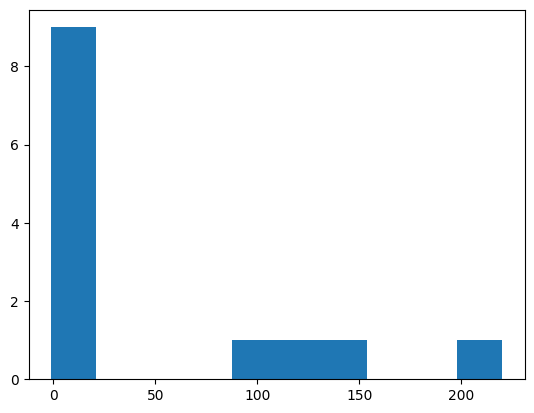

In [61]:
plt.hist(num_feature);

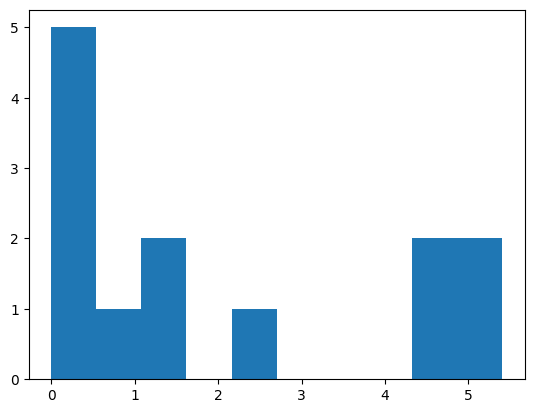

In [62]:
adjusted_num_feature = num_feature - np.min(num_feature)

adjusted_num_feature_log = np.log1p(adjusted_num_feature)

plt.hist(adjusted_num_feature_log);

# Can we combine a categorical feature and a numerical feature to create a new feature?

# Category-wise Numeric Aggregates

In [63]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,...,x_scaled,carat_mean_imputed,carat_with_clarity_mean,carat_with_clarity_cut_mean,depth_mean_imputed,carat_with_clarity_cut_mean_interaction_depth,carat_with_clarity_cut_mean_squared,carat_with_clarity_cut_mean_plus_depth,is_carat_low,carat_categories
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,...,-1.293628,0.300000,0.300000,-1.213736,0.254475,-0.308865,1.473155,-0.959261,True,0.0
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,...,-1.160708,0.330000,0.330000,-1.140689,-0.677789,0.773147,1.301172,-1.818478,True,0.0
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,...,0.274832,0.900000,0.900000,0.247198,0.326187,0.080633,0.061107,0.573385,False,2.0
3,4,NaN,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,...,-0.806254,0.799223,0.728052,-0.296746,-0.104088,0.030888,0.088058,-0.400835,False,NaN
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,...,-1.222737,0.310000,0.310000,-1.189387,-0.964639,1.147330,1.414642,-2.154026,True,0.0


In [64]:
df.groupby("cut")["depth"].mean()

,depth
cut,
Fair,63.945575
Good,62.372124
Ideal,61.705651
Premium,61.267243
Very Good,61.823852


In [65]:
df["cutwise_depth_mean"] = df.groupby("cut")["depth"].transform("mean")

df[["cut", "depth", "cutwise_depth_mean"]].head(10)

,cut,depth,cutwise_depth_mean
0,Ideal,62.1,61.705651
1,Premium,60.8,61.267243
2,Very Good,62.2,61.823852
3,Ideal,61.6,61.705651
4,Ideal,60.4,61.705651
5,Ideal,61.5,61.705651
6,Good,63.7,62.372124
7,Premium,61.5,61.267243
8,Good,63.8,62.372124
9,Ideal,60.5,61.705651


# Leathal Weapon Target Encoding

### Encodes some information about the target variable.
### Can be risky - very high chance of overfitting.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

train, test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

for col in train.columns:
    if train[col].dtype == "O":
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])

y_train = train["price"]
x_train = train.drop(columns=["price"])

y_test = test["price"]
x_test = test.drop(columns=["price"])

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

score = mean_squared_error(y_test, model.predict(x_test))
score = np.sqrt(score)
score

822.3371844558781

In [67]:
cutwise_price_mean = train.groupby("cut")["price"].mean()
colorwise_price_mean = train.groupby("color")["price"].mean()
claritywise_price_mean = train.groupby("clarity")["price"].mean()

cutwise_price_mean

,price
cut,
0,4573.958665
1,3931.185904
2,3453.455082
3,4534.167331
4,4034.050497


In [68]:
train["cutwise_price_mean"] = train["cut"].map(cutwise_price_mean)
test["cutwise_price_mean"] = test["cut"].map(cutwise_price_mean)

train["colorwise_price_mean"] = train["color"].map(colorwise_price_mean)
test["colorwise_price_mean"] = test["color"].map(colorwise_price_mean)

train["claritywise_price_mean"] = train["clarity"].map(claritywise_price_mean)
test["claritywise_price_mean"] = test["clarity"].map(claritywise_price_mean)

In [69]:
y_train = train["price"]
x_train = train.drop(columns=["price"])

y_test = test["price"]
x_test = test.drop(columns=["price"])

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

score = mean_squared_error(y_test, model.predict(x_test))
score = np.sqrt(score)
score

830.5020504060103

# Using ML to handle null values

In [70]:
import numpy as np

df = pd.read_csv("cubic_zirconia.csv")

replace_percentage = 0.3
n_replace = int(df.shape[0] * replace_percentage)

nan_indices = np.random.choice(df.index, n_replace, replace=False)
df.loc[nan_indices, 'carat'] = np.nan

In [71]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = [col for col in df.columns if df[col].dtype == "O"]

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(
    ohe.fit_transform(df[cat_cols]).toarray(),
    columns=list(itertools.chain(*ohe.categories_))
)

df = df.drop(columns=cat_cols)

df = pd.concat([df, ohe_df], axis=1)

df.head(10)

,Unnamed: 0,carat,depth,table,x,y,z,price,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1,0.30,62.1,58.0,4.27,4.29,2.66,499,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.33,60.8,58.0,4.42,4.46,2.70,984,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.90,62.2,60.0,6.04,6.12,3.78,6289,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.42,61.6,56.0,4.82,4.80,2.96,1082,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,NaN,60.4,59.0,4.35,4.43,2.65,779,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,NaN,61.5,56.0,6.46,6.49,3.99,9502,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,NaN,63.7,60.0,6.35,6.30,4.03,4836,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,8,NaN,61.5,62.0,5.09,5.06,3.12,1415,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,9,1.21,63.8,64.0,6.72,6.63,4.26,5407,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,NaN,60.5,57.0,4.52,4.60,2.76,706,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
sampled_df = df.sample(500, random_state=42)

sampled_df.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
9922,9923,NaN,60.5,60.0,6.65,6.67,4.03,5667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25556,25557,NaN,63.5,55.0,4.69,4.73,2.99,638,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22421,22422,NaN,59.8,59.0,4.07,4.09,2.44,450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18128,18129,1.52,62.8,56.0,7.32,7.30,4.59,12764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14105,14106,0.42,62.1,55.0,4.78,4.81,2.98,1326,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
%%time

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
    imputer.fit_transform(sampled_df.drop(columns=["Unnamed: 0"])),
    columns=sampled_df.columns[1:]
)

CPU times: user 18.9 ms, sys: 3.86 ms, total: 22.8 ms
Wall time: 22.9 ms


In [74]:
df_imputed["carat_og"] = sampled_df["carat"].values

df_imputed[df_imputed["carat_og"].isna()][["carat_og", "carat"]].head(10)

,carat_og,carat
0,NaN,1.128
1,NaN,0.322
2,NaN,0.282
6,NaN,0.470
8,NaN,1.114
11,NaN,0.968
16,NaN,0.324
18,NaN,0.342
20,NaN,0.370
22,NaN,0.360


In [75]:
# using grid search to find the best hyperparameters for cubic_zirconia dataset
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

X = df_imputed.drop(["carat"], axis=1)
y = df_imputed["carat"]

grid_search.fit(X, y)
grid_search.best_params_
grid_search.best_score_

# using the best hyperparameters to train the model

rf_best = RandomForestRegressor(**grid_search.best_params_)
rf_best.fit(X, y)

# predicting the target for the test data

test_df = df_imputed.sample(100, random_state=42)
X_test = test_df.drop(["carat"], axis=1)
y_pred = rf_best.predict(X_test)

score = mean_squared_error(y, rf_best.predict(X))
score = np.sqrt(score)

print("RMSE on training data: {:.2f}".format(score))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
RMSE on training data: 0.04


In [76]:
# using random search to find the best hyperparameters for cubic_zirconia dataset
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2)

random_search.fit(X, y)
random_search.best_params_
random_search.best_score_

# using the best hyperparameters to train the model

rf_best = RandomForestRegressor(**random_search.best_params_)
rf_best.fit(X, y)

# predicting the target for the test data

y_pred = rf_best.predict(X_test)

score = mean_squared_error(y, rf_best.predict(X))
score = np.sqrt(score)
print("RMSE on training data: {:.2f}".format(score))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
RMSE on training data: 0.04


# NOTE: Check out XgBoost imputer !!